## General Objectives of the Project and Activities to be Carried Out

Project Objective: The aim of this project is to examine the relationships between economic and health indicators of various countries, to analyse the changes in these indicators over the years and to make predictions about future trends. In this context, it is aimed to understand the correlations and trends between these variables by analysing the Gross Domestic Product (GDP) and life expectancy data of the countries.

### Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Loading and Inspecting the Dataset

In [2]:
df = pd.read_csv("all_data.csv")

In [45]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.rename(columns={"Life expectancy at birth (years)":"LEABY"},inplace=True)

### GDP Distribution Analysis
#### Objective: In this analysis, the distribution of GDP (Gross Domestic Product) values of various countries will be examined. The aim is to provide information on the general trend, symmetry, spread and possible outliers of the GDP data.

##### Steps:
Visualisation of GDP data with histograms.

Interpreting the results and analysing the distribution of the data.

This analysis is critical for understanding the differences between the economic size of countries and the distribution of these differences.

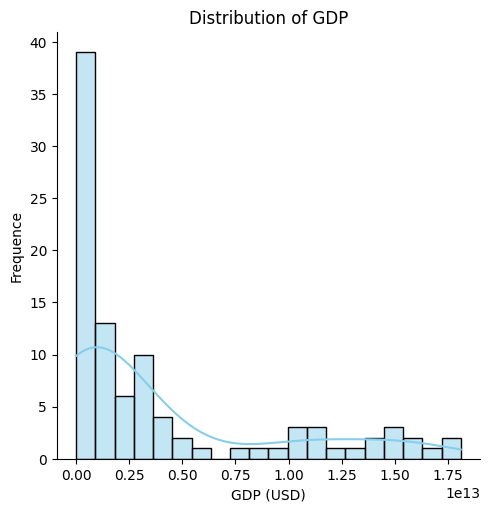

In [73]:
gdp_values = df['GDP']

sns.displot(gdp_values, bins=20, color='skyblue', edgecolor='black',kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP (USD)')
plt.ylabel('Frequence')
plt.show()

The distribution of GDP data shows that most countries have low GDP values, while only a few countries reach very high GDP values, suggesting large differences in economic terms. The skewness to the right in the graph clearly reflects the economic differences between high- and middle-income countries, while the histogram shows that the concentration is concentrated in low GDP values and a few countries are outliers with high GDP.

### Cross-Country GDP Analysis

#### Objective: In this analysis, the GDP (Gross Domestic Product) trends of different countries between 2000 and 2015 will be analysed. The aim is to visually compare economic growth and fluctuations between countries and to evaluate the economic performance of each country.

##### Steps:

Analysing annual GDP data by country.

Visualising the annual GDP trends for each country with a line graph.

Comparison and interpretation of results.

This analysis will help us understand and compare how countries' economic performance has changed over time

In [76]:
def format_large_numbers(num): 
    if num >= 1e12: 
        return f'{num / 1e12:.2f} Trillion USD' 
    else: 
        return f'{num / 1e9:.2f} Billion USD' 
    
gdp_stats = df.groupby("Country")["GDP"].agg(["mean", "median", "min", "max"]).reset_index() 
gdp_stats["mean"] = gdp_stats["mean"].apply(format_large_numbers) 
gdp_stats["median"] = gdp_stats["median"].apply(format_large_numbers) 
gdp_stats["min"] = gdp_stats["min"].apply(format_large_numbers) 
gdp_stats["max"] = gdp_stats["max"].apply(format_large_numbers)

gdp_stats

,Country,mean,median,min,max
0,Chile,169.79 Billion USD,173.00 Billion USD,69.74 Billion USD,278.38 Billion USD
1,China,4.96 Trillion USD,4.08 Trillion USD,1.21 Trillion USD,11.06 Trillion USD
2,Germany,3.09 Trillion USD,3.40 Trillion USD,1.95 Trillion USD,3.89 Trillion USD
3,Mexico,976.65 Billion USD,1.00 Trillion USD,683.65 Billion USD,1.30 Trillion USD
4,United States of America,14.07 Trillion USD,14.45 Trillion USD,10.30 Trillion USD,18.10 Trillion USD
5,Zimbabwe,9.06 Billion USD,6.73 Billion USD,4.42 Billion USD,16.30 Billion USD


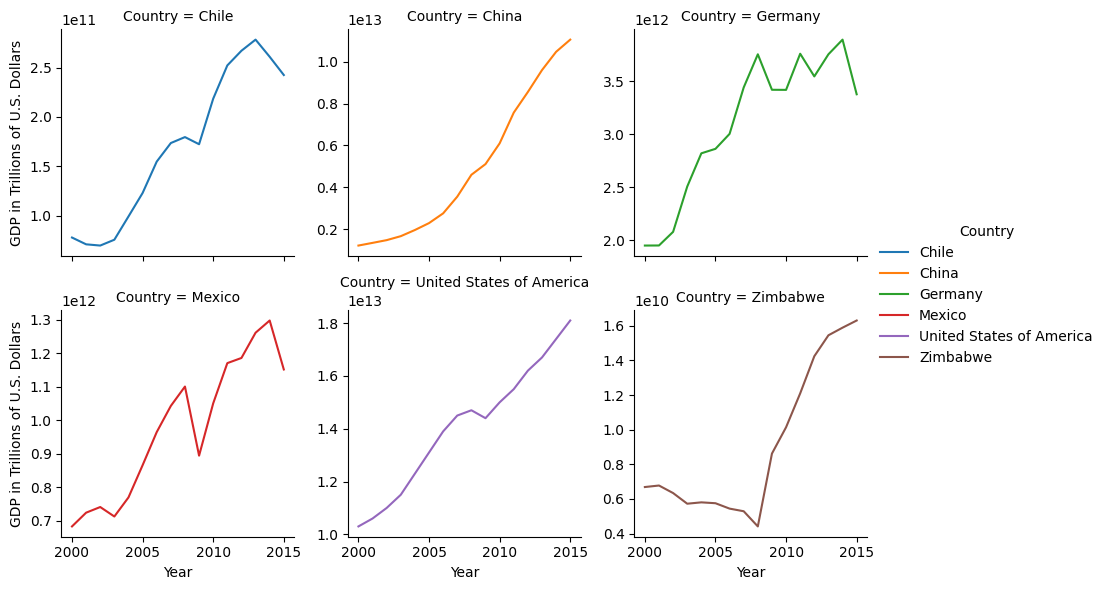

In [63]:
GDP_facegrid = sns.FacetGrid(df, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

GDP_facegrid = (GDP_facegrid.map(sns.lineplot, "Year", "GDP")
                  .add_legend()
                  .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

GDP_facegrid;

The chart compares the GDP trends of six different countries between 2000 and 2015. While Chile shows a slight decline after peaking around 2013, China shows its rapid economic growth with a continuous increase. Germany follows a stable growth trend, with fluctuations in 2008 and 2012. Mexico and the United States are characterised by generally stable growth trends. Zimbabwe, on the other hand, shows an overall increase, with significant fluctuations in 2008 and 2012. These graphs clearly illustrate the economic performance and growth trends of each country.

### Analyses Cross-Country Life Expectancy Statistics

#### Objective: In this analysis, life expectancy statistics in various countries will be analysed and compared. The aim is to understand the differences between countries in terms of life expectancy and to visualise these statistics.

##### Steps:
Calculating life expectancy statistics (mean, median, minimum and maximum) by country.

Presenting the average life expectancy statistics of countries with a bar graph.

Interpretation of the results.

In [67]:
df.groupby("Country")["LEABY"].agg(["mean","median","min","max"]).reset_index()

,Country,mean,median,min,max
0,Chile,78.94375,79.00,77.3,80.5
1,China,74.26250,74.45,71.7,76.1
2,Germany,79.65625,79.85,78.0,81.0
3,Mexico,75.71875,75.65,74.8,76.7
4,United States of America,78.06250,78.15,76.8,79.3
5,Zimbabwe,50.09375,47.40,44.3,60.7


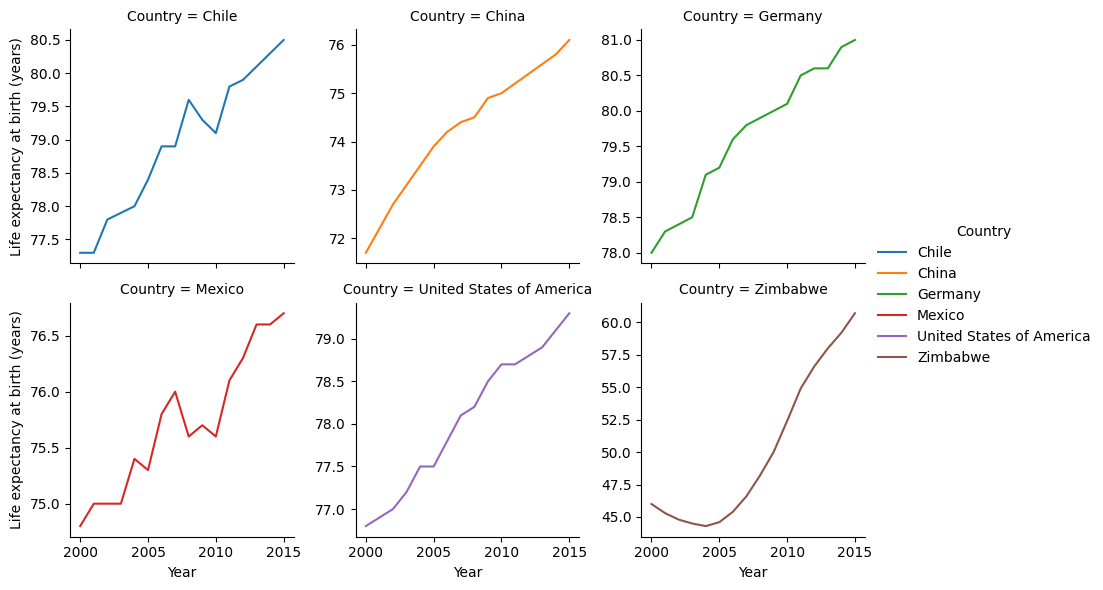

In [68]:
LEABY_facegrid = sns.FacetGrid(df, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

LEABY_facegrid = (LEABY_facegrid.map(sns.lineplot, "Year", "LEABY")
                  .add_legend()
                  .set_axis_labels("Year","Life expectancy at birth (years)"))

LEABY_facegrid;

The graph clearly shows the differences between countries in terms of life expectancy. Germany and Chile have the highest life expectancy and are characterised by improved health care and living standards. The United States also has a high life expectancy, but lags slightly behind Germany and Chile. China and Mexico show intermediate life expectancy, while Zimbabwe has the lowest life expectancy, reflecting the negative impact of economic and social challenges on health. These data show how different countries can be in terms of health and quality of life, and how economic development has a significant impact on life expectancy.

### GDP Trends and Future Forecasts by Year

#### Objective: In this analysis, a linear regression model will be constructed to examine the trend of GDP (Gross Domestic Product) values of a given country over the years and to predict future GDP values, and the changes over the years will be visualised with a line graph.

##### Steps:

Visualising the changes in GDP over the years with a line graph.

Separation of data into training and test sets.

Building and training the linear regression model.

Evaluation of the performance of the model.

Making GDP forecasts for future years.

Interpretation of the results.

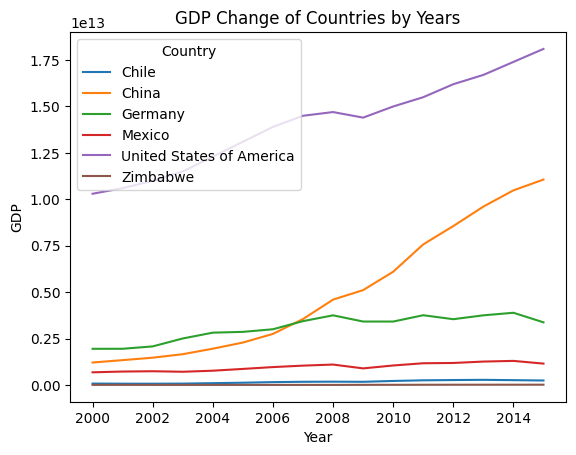

In [48]:
sns.lineplot(x="Year",y="GDP",hue="Country",data=df)
plt.title("GDP Change of Countries by Years")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

The chart compares the Gross Domestic Product (GDP) and economic growth trends of various countries between 2000 and 2015. The United States and China stand out with the highest GDP levels, while China's rapid economic growth is remarkable. Germany shows a steady increase, while Chile and Mexico show more limited growth. Zimbabwe presents an economically backward outlook with the lowest GDP levels.

Training set R^2 for United States of America: 0.966255015108991
Test set R^2 for United States of America: 0.9960473220114374
Training set MSE for United States of America: 1.3620788206979218e+23
Test set MSE for United States of America: 3.1947519842557194e+22


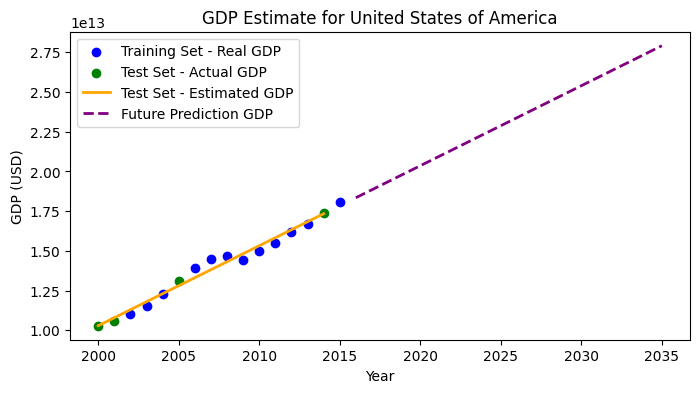

Slope: 503429602888.0866
Intercept: -996571119133573.9


In [49]:
def gdp_year_prediction(country,future_years):
    country_data = df[df["Country"]==country]

    X = country_data["Year"].values.reshape(-1,1)
    y = country_data["GDP"].values.reshape(-1,1)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    model = LinearRegression()
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)

    future_X = np.array([range(X.max() +1, X.max() +1 + future_years)]).reshape(-1,1)
    future_pred = model.predict(future_X)

    print(f"Training set R^2 for {country}: {r2_score(y_train, y_train_pred)}") 
    print(f"Test set R^2 for {country}: {r2_score(y_test, y_test_pred)}") 
    print(f"Training set MSE for {country}: {mean_squared_error(y_train, y_train_pred)}")                                                                                                                                                             
    print(f"Test set MSE for {country}: {mean_squared_error(y_test, y_test_pred)}")

    plt.figure(figsize=(8, 4)) 
    plt.scatter(X_train, y_train, color="blue", label="Training Set - Real GDP") 
    plt.scatter(X_test, y_test, color="green", label="Test Set - Actual GDP") 
    plt.plot(X_test, y_test_pred, color="orange", linewidth=2, label="Test Set - Estimated GDP") 
    plt.plot(future_X, future_pred, color='purple', linewidth=2, linestyle='dashed', label='Future Prediction GDP')
    plt.title(f"GDP Estimate for {country}") 
    plt.xlabel("Year") 
    plt.ylabel("GDP (USD)") 
    plt.legend() 
    plt.show()

    print(f"Slope: {model.coef_[0][0]}") 
    print(f"Intercept: {model.intercept_[0]}")

gdp_year_prediction('United States of America',20)

The regression model for predicting the future GDP of the USA showed high performance (R^2 values: 0.966 for the training set and 0.996 for the test set) on the training and test data. This indicates that the model generally predicts the data accurately and the future values are reasonable. However, we should keep in mind that all predictions are based on certain assumptions and external factors can influence these predictions.

### Life Expectancy and GDP Relationship

#### Objective: This analysis will examine the relationship between life expectancy and Gross Domestic Product (GDP) in various countries. The aim is to understand the impact of GDP on life expectancy.

##### Steps:
Visualisation analysis of the relationship between GDP and life expectancy by country

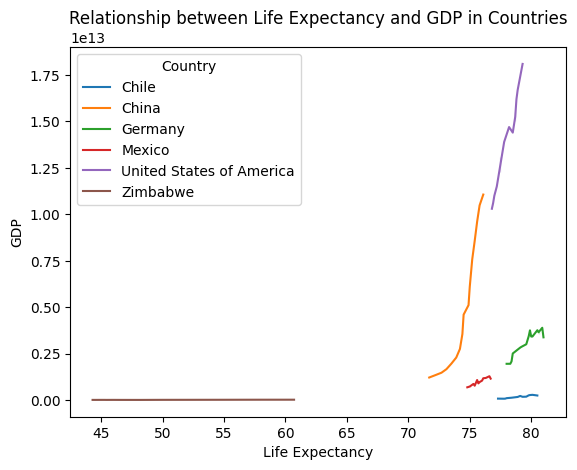

In [50]:
sns.lineplot(x="LEABY",y="GDP",hue="Country",data=df)
plt.title("Relationship between Life Expectancy and GDP in Countries")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.show()

The graph shows the relationship between life expectancy and GDP (Gross Domestic Product) values of various countries between 2000 and 2015. The United States and China stand out from other countries with high GDP and life expectancy. Especially China's rapid economic growth is remarkable. Germany shows a steady increase, but not as fast as the United States and China. Chile and Mexico show more limited growth, while Zimbabwe, with its low GDP and life expectancy, is the country where economic difficulties and health problems are most evident. This graph clearly illustrates the large economic and health disparities between countries.

### Life Expectancy Trends by Year

#### Objective: In this analysis, a line graph will be used to examine the trend of life expectancy values of a given country over the years. The aim is to visualise the changes in life expectancy over time across countries.

##### Steps:
Visualisation of changes over the years using a line graph.

Interpretation of the results.

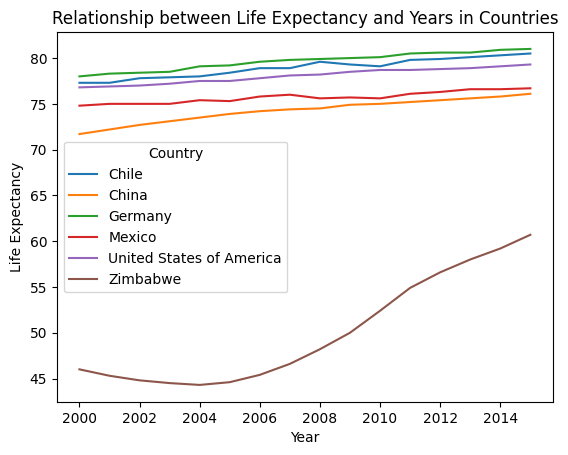

In [51]:
sns.lineplot(x="Year",y="LEABY",hue="Country",data=df)
plt.title("Relationship between Life Expectancy and Years in Countries")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()

The graph shows the relationship between life expectancy and years in various countries between 2000 and 2015. Life expectancy in Germany, Chile and the United States is close to 80 years, while life expectancy in China and Mexico is around 75 years. Zimbabwe's life expectancy increased from about 45 years in 2000 to 60 years in 2015. This graph is important for understanding developments in health and living conditions by visualising life expectancy differences between countries and changes over time. The great improvement in Zimbabwe is particularly striking.

### Conclusion and Summary

#### Project Results: This project has revealed important findings by analysing the relationships between economic and health indicators of various countries. By analysing GDP (Gross Domestic Product) and life expectancy data, we were able to understand the differences in economic size and quality of life between countries. Here are the main results from the project:

##### GDP Comparison across Countries:

China and the United States have much higher GDP values compared to other countries, while Zimbabwe has the lowest GDP values. This is an important indicator of economic disparities between countries.

Countries such as Germany, Chile and Mexico are in the middle levels in terms of economic size.

##### GDP Trends by Year:

In most countries, GDP has increased over time. However, economic fluctuations have been observed in some countries such as Chile and Germany.

China's continuously increasing GDP trend reflects its rapid economic growth.

##### Life Expectancy Analyses:

Average life expectancy varies widely across countries. While countries such as Germany and Chile have high life expectancy values, Zimbabwe has very low values.

The distribution of life expectancy over the years was also analysed and it was observed that the quality of life in some countries has improved over time.

##### GDP Distribution:

The distribution of GDP data shows that most countries have low GDP values and only a few countries reach very high GDP values. This is considered as an important indicator of economic inequalities.

#### Project Summary: 
This project analysed the economic and health indicators of countries in depth, with significant results. The analyses revealed economic disparities between countries and the impact of these disparities on quality of life. Time series analyses and statistical summaries helped us understand the overall structure of the data and predict future trends. Overall, this project has led to a better understanding of the relationships between economic growth and quality of life and has laid a solid foundation for future research in these areas.